In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
#!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize
from sklearn.metrics import classification_report, roc_auc_score, log_loss, mean_squared_error, brier_score_loss

## Import and Clean Data

In [3]:
# IMPORT FROM CSV's
df = pd.read_csv('data/hn_all_w_sentiment_cleaned_inplace.csv')
print(df.shape)

(15397309, 19)


In [4]:
df_loaded =  df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15397309 entries, 0 to 15397308
Data columns (total 19 columns):
commentor               object
comment_time            int64
commentid               int64
parentid                int64
comment_deleted         float64
comment_dead            object
ranking                 float64
author                  object
score                   float64
story_time              float64
parent_type             object
parents_parent          float64
parent_deleted          object
parent_dead             object
num_children            float64
cleaned_comment         object
cleaned_title           object
comment_polarity        float64
comment_subjectivity    float64
dtypes: float64(8), int64(3), object(8)
memory usage: 2.2+ GB


In [5]:
df = df[['commentor',
 'comment_time',
 'commentid',
 'parentid',
 'author',
 'story_time',
 'parent_type',
 'cleaned_comment',
 'cleaned_title',
 'comment_polarity',
 'comment_subjectivity']]

In [6]:
df.head()

,commentor,comment_time,commentid,parentid,author,story_time,parent_type,cleaned_comment,cleaned_title,comment_polarity,comment_subjectivity
0,Twisell,1548920587,19043154,19035834,epaga,1.548862e+09,story,How come this is already gone from the front p...,Apple blocks Facebook from running its interna...,0.000000,0.000000
1,camus2,1396456650,7516784,7516418,kelvin0,1.396454e+09,comment,You could still maintain a level of compatibil...,Another Comment,0.108333,0.639583
2,acqq,1524697885,16927263,16923511,celticninja,1.524675e+09,comment,"Just that word wouldn't be unambiguous, e.g. (...",Another Comment,-0.400000,0.600000
3,aestra,1392397390,7239514,7234721,taybin,1.392329e+09,comment,I had a friend call the paramedics from home w...,Another Comment,-0.333333,0.666667
4,AnimalMuppet,1459789890,11423531,11422828,aantix,1.459785e+09,comment,You don't see a difference in whether or not y...,Another Comment,0.053241,0.514815


In [7]:
pred_columns = ['id',
                'toxic',
                'severe_toxic',
                'obscene',
                'threat',
                'insult',
                'identity_hate']


df_1 = pd.read_csv("last_chance_predictions/a1_predictions.tsv", names = pred_columns)
df_2 = pd.read_csv("last_chance_predictions/a2_predictions.tsv", names = pred_columns)
df_3 = pd.read_csv("last_chance_predictions/a3_predictions.tsv", names = pred_columns)
df_4 = pd.read_csv("last_chance_predictions/a4_predictions.tsv", names = pred_columns)
df_5 = pd.read_csv("last_chance_predictions/a5_predictions.tsv", names = pred_columns)
df_6 = pd.read_csv("last_chance_predictions/a6_predictions.tsv", names = pred_columns)
df_7 = pd.read_csv("last_chance_predictions/a7_predictions.tsv", names = pred_columns)
df_8 = pd.read_csv("last_chance_predictions/a8_predictions.tsv", names = pred_columns)
df_9 = pd.read_csv("last_chance_predictions/a9_predictions.tsv", names = pred_columns)
df_10 = pd.read_csv("last_chance_predictions/a10_predictions.tsv", names = pred_columns)
df_11 = pd.read_csv("last_chance_predictions/a11_predictions.tsv", names = pred_columns)
display(df_1.head())
display(df_1.info())

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,19043154,0.000198,0.000101,0.000105,0.000080,0.000118,0.000103
1,7516784,0.000171,0.000114,0.000115,0.000094,0.000115,0.000102
2,16927263,0.000186,0.000106,0.000111,0.000083,0.000120,0.000101
3,7239514,0.000157,0.000124,0.000112,0.000108,0.000120,0.000118
4,11423531,0.001122,0.000157,0.000484,0.000102,0.001324,0.000539


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539728 entries, 0 to 1539727
Data columns (total 7 columns):
id               1539728 non-null int64
toxic            1539728 non-null float64
severe_toxic     1539728 non-null float64
obscene          1539728 non-null float64
threat           1539728 non-null float64
insult           1539728 non-null float64
identity_hate    1539728 non-null float64
dtypes: float64(6), int64(1)
memory usage: 82.2 MB


None

In [8]:
df_pred = pd.concat([df_1,
                      df_2,
                      df_3,
                      df_4,
                      df_5,
                      df_6,
                      df_7,
                      df_8,
                      df_9,
                      df_10,
                      df_11])
df_pred.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,19043154,0.000198,0.000101,0.000105,0.000080,0.000118,0.000103
1,7516784,0.000171,0.000114,0.000115,0.000094,0.000115,0.000102
2,16927263,0.000186,0.000106,0.000111,0.000083,0.000120,0.000101
3,7239514,0.000157,0.000124,0.000112,0.000108,0.000120,0.000118
4,11423531,0.001122,0.000157,0.000484,0.000102,0.001324,0.000539


In [9]:
df = df.merge(df_pred, how = "left", left_on = df["commentid"], right_on = df_pred["id"])

In [10]:
display(df.head())
display(df.info())
display(df.isnull().sum())

,key_0,commentor,comment_time,commentid,parentid,author,story_time,parent_type,cleaned_comment,cleaned_title,comment_polarity,comment_subjectivity,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,19043154,Twisell,1548920587,19043154,19035834,epaga,1.548862e+09,story,How come this is already gone from the front p...,Apple blocks Facebook from running its interna...,0.000000,0.000000,19043154.0,0.000198,0.000101,0.000105,0.000080,0.000118,0.000103
1,7516784,camus2,1396456650,7516784,7516418,kelvin0,1.396454e+09,comment,You could still maintain a level of compatibil...,Another Comment,0.108333,0.639583,7516784.0,0.000171,0.000114,0.000115,0.000094,0.000115,0.000102
2,16927263,acqq,1524697885,16927263,16923511,celticninja,1.524675e+09,comment,"Just that word wouldn't be unambiguous, e.g. (...",Another Comment,-0.400000,0.600000,16927263.0,0.000186,0.000106,0.000111,0.000083,0.000120,0.000101
3,7239514,aestra,1392397390,7239514,7234721,taybin,1.392329e+09,comment,I had a friend call the paramedics from home w...,Another Comment,-0.333333,0.666667,7239514.0,0.000157,0.000124,0.000112,0.000108,0.000120,0.000118
4,11423531,AnimalMuppet,1459789890,11423531,11422828,aantix,1.459785e+09,comment,You don't see a difference in whether or not y...,Another Comment,0.053241,0.514815,11423531.0,0.001122,0.000157,0.000484,0.000102,0.001324,0.000539


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18476765 entries, 0 to 18476764
Data columns (total 19 columns):
key_0                   int64
commentor               object
comment_time            int64
commentid               int64
parentid                int64
author                  object
story_time              float64
parent_type             object
cleaned_comment         object
cleaned_title           object
comment_polarity        float64
comment_subjectivity    float64
id                      float64
toxic                   float64
severe_toxic            float64
obscene                 float64
threat                  float64
insult                  float64
identity_hate           float64
dtypes: float64(10), int64(4), object(5)
memory usage: 2.8+ GB


None

key_0                       0
commentor                   0
comment_time                0
commentid                   0
parentid                    0
author                  32563
story_time                  0
parent_type                 0
cleaned_comment            23
cleaned_title              32
comment_polarity            0
comment_subjectivity        0
id                         23
toxic                      23
severe_toxic               23
obscene                    23
threat                     23
insult                     23
identity_hate              23
dtype: int64

In [11]:
df["author"] = df.fillna("Unknown Author")

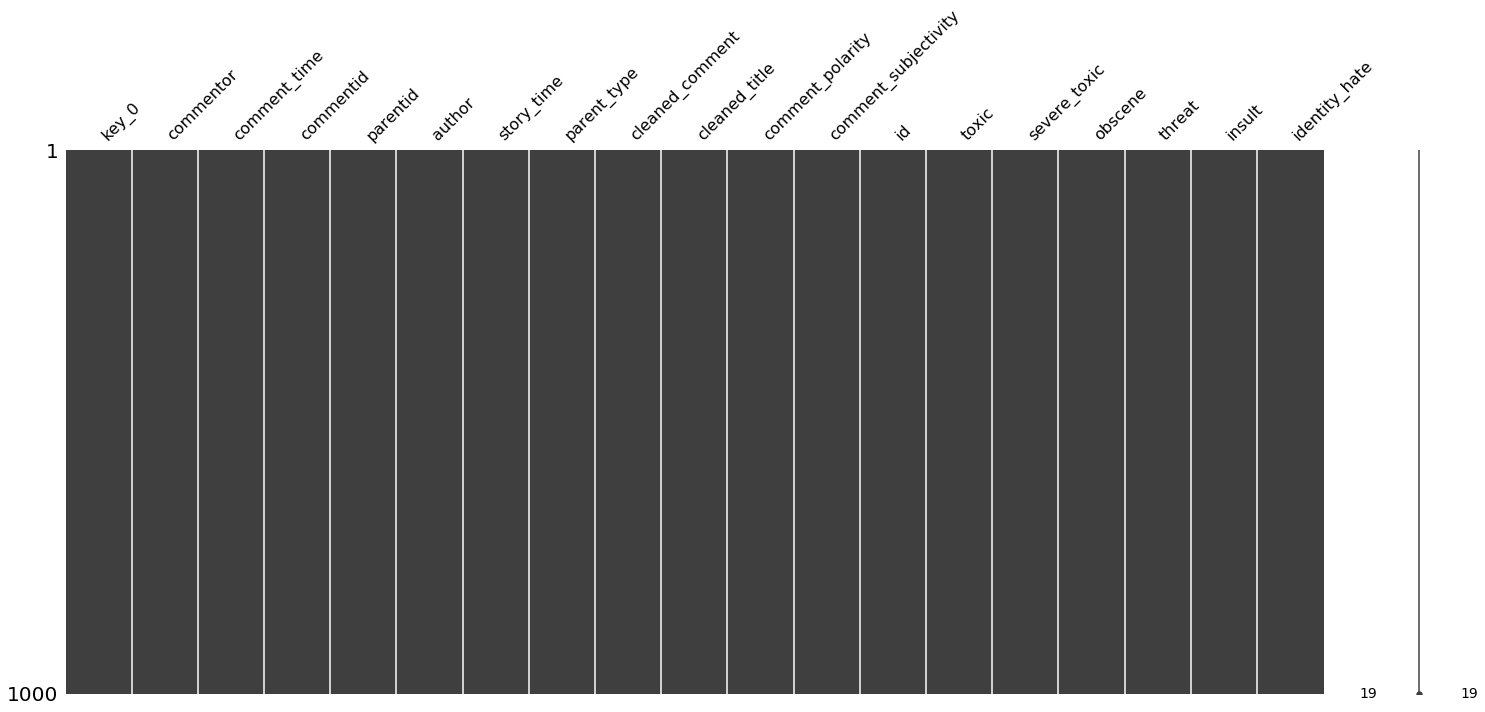

In [12]:
msno.matrix(df.sample(1000))

In [13]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [14]:
display(df.isnull().sum())

key_0                   0
commentor               0
comment_time            0
commentid               0
parentid                0
author                  0
story_time              0
parent_type             0
cleaned_comment         0
cleaned_title           0
comment_polarity        0
comment_subjectivity    0
id                      0
toxic                   0
severe_toxic            0
obscene                 0
threat                  0
insult                  0
identity_hate           0
dtype: int64

In [15]:
# Downcast floats, makes the DF lighter / faster. 
df_floats = df.select_dtypes(include=['float']).columns.to_list()
df_floats
df_float = df.select_dtypes(include=['float'])
df_float = df_float.apply(pd.to_numeric,downcast='float')
df[df_floats] = df_float[df_floats]
del(df_float)

In [16]:
# Downcast ints, makes the DF lighter / faster
df_ints = df.select_dtypes(include=['int']).columns.to_list()
df_int = df.select_dtypes(include=['int'])
df_int = df_int.apply(pd.to_numeric,downcast='unsigned')
df[df_ints] = df_int[df_ints]
del(df_int)

In [17]:
#df.to_csv("datav2/data_and_results_w_selected_fields.csv", index = False)

In [18]:
df.head()

,key_0,commentor,comment_time,commentid,parentid,author,story_time,parent_type,cleaned_comment,cleaned_title,comment_polarity,comment_subjectivity,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,19043154,Twisell,1548920587,19043154,19035834,19043154,1.548862e+09,story,How come this is already gone from the front p...,Apple blocks Facebook from running its interna...,0.000000,0.000000,19043154.0,0.000198,0.000101,0.000105,0.000080,0.000118,0.000103
1,7516784,camus2,1396456650,7516784,7516418,7516784,1.396454e+09,comment,You could still maintain a level of compatibil...,Another Comment,0.108333,0.639583,7516784.0,0.000171,0.000114,0.000115,0.000094,0.000115,0.000102
2,16927263,acqq,1524697885,16927263,16923511,16927263,1.524675e+09,comment,"Just that word wouldn't be unambiguous, e.g. (...",Another Comment,-0.400000,0.600000,16927264.0,0.000186,0.000106,0.000111,0.000083,0.000120,0.000101
3,7239514,aestra,1392397390,7239514,7234721,7239514,1.392329e+09,comment,I had a friend call the paramedics from home w...,Another Comment,-0.333333,0.666667,7239514.0,0.000157,0.000124,0.000112,0.000108,0.000120,0.000118
4,11423531,AnimalMuppet,1459789890,11423531,11422828,11423531,1.459785e+09,comment,You don't see a difference in whether or not y...,Another Comment,0.053241,0.514815,11423531.0,0.001122,0.000157,0.000484,0.000102,0.001324,0.000539


In [19]:
df = df.drop(['key_0', 'id'], axis=1)

In [20]:
df = df.fillna(value=0)
df = df.rename(columns={'author': 'parent_author', 
                        'cleaned_title': 'parent_title',
                        'score': 'parent_score', 
                        'story_time': 'parent_time', 
                        'ranking': 'comment_rank',
                        'commentid':'comment_id',
                        'parentid':'parent_id',
                        "severe_toxic": "severe_toxicity",
                        "identity_hate":'identity_attack'})
display(df.head(3))
display(df.tail(3))

,commentor,comment_time,comment_id,parent_id,parent_author,parent_time,parent_type,cleaned_comment,parent_title,comment_polarity,comment_subjectivity,toxic,severe_toxicity,obscene,threat,insult,identity_attack
0,Twisell,1548920587,19043154,19035834,19043154,1.548862e+09,story,How come this is already gone from the front p...,Apple blocks Facebook from running its interna...,0.000000,0.000000,0.000198,0.000101,0.000105,0.000080,0.000118,0.000103
1,camus2,1396456650,7516784,7516418,7516784,1.396454e+09,comment,You could still maintain a level of compatibil...,Another Comment,0.108333,0.639583,0.000171,0.000114,0.000115,0.000094,0.000115,0.000102
2,acqq,1524697885,16927263,16923511,16927263,1.524675e+09,comment,"Just that word wouldn't be unambiguous, e.g. (...",Another Comment,-0.400000,0.600000,0.000186,0.000106,0.000111,0.000083,0.000120,0.000101


,commentor,comment_time,comment_id,parent_id,parent_author,parent_time,parent_type,cleaned_comment,parent_title,comment_polarity,comment_subjectivity,toxic,severe_toxicity,obscene,threat,insult,identity_attack
18476762,idlewords,1409161605,8233512,8233440,8233512,1.409161e+09,comment,This is one reason why I think the concept of ...,Another Comment,-0.146875,0.522917,0.000376,0.000086,0.000209,0.000060,0.000185,0.000117
18476763,daxfohl,1468683090,12106663,12105428,12106663,1.468649e+09,story,"Best lightweight option out there for C#, but ...",Nancy – A lightweight web framework for .NET,0.191667,0.598148,0.000188,0.000102,0.000113,0.000083,0.000126,0.000098
18476764,conesus,1529372685,17343155,17343097,17343155,1.529372e+09,comment,Stay curious and well read and ideas will come...,Another Comment,0.350000,0.875000,0.000198,0.000099,0.000116,0.000074,0.000125,0.000095


In [21]:
# Remove duplicates by ID
display(df.shape)
df.drop_duplicates(subset ="comment_id", keep = 'first', inplace = True) 
display(df.shape)

(18476710, 17)

(15397259, 17)

In [22]:
# Make a small checkpoint
df_clone = df.copy()

In [23]:
df = df_clone

# Define saltiness
df['old_saltiness'] = (df['comment_polarity'].multiply(df['comment_subjectivity']))
df['comment_saltiness'] = (df['toxic'].multiply(-1).add(.5).multiply(2))

# Toxicity Weight Adjustment & Augmentation
df['obscene'], df['threat'], df['insult'], df['identity_attack'] = (df['obscene'] * .75), (df['threat'] * 1), (df['insult'] * .85), (df['identity_attack'] * .94)
df['comment_saltiness'] = df['comment_saltiness'] - (df['severe_toxicity'] * 1.5) - (df[["obscene", "threat", "insult", "identity_attack"]].max(axis=1) * .75) - (df[["obscene", "threat", "insult", "identity_attack"]].mean(axis=1) * .25)

# Boolean Flag Creation
df['is_salty'] = (df['comment_saltiness'].map(lambda x: True if (x < 0) else False))
df['is_severe_toxicity'] = (df['severe_toxicity'].map(lambda x: True if (x > .5) else False))
df['is_obscene'] = (df['obscene'].map(lambda x: True if (x > .5) else False))
df['is_identity_attack'] = (df['identity_attack'].map(lambda x: True if (x > .5) else False))
df['is_insult'] = (df['insult'].map(lambda x: True if (x > .5) else False))
df['is_threat'] = (df['threat'].map(lambda x: True if (x > .5) else False))

In [24]:
df = df.sort_values(by = ["comment_saltiness"], ascending = False)

In [27]:
# Top Toxic Comments

def print_full(x):
    x = x[x['is_salty'] == True].tail(20).iloc[:, [0,1,7,11,12,13,14,15,16,18]]
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', -1)
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
    
print_full(df)

,commentor,comment_time,cleaned_comment,toxic,severe_toxicity,obscene,threat,insult,identity_attack,comment_saltiness
7288696,weakme,1438781678,tae mo mabaho tangina balik na kayo mga hampaslupa fuck you my nigga,1.00,0.90,0.75,0.04,0.85,0.93,-3.20
3852906,trumpownsyou420,1503736701,"gonna call it your ass, ya fuggin slut",1.00,0.98,0.75,0.04,0.84,0.07,-3.20
4421176,eric_lu,1519322925,lick my balls nigga,1.00,0.90,0.75,0.02,0.85,0.94,-3.20
853419,eyeueye,1473426710,Hahaha ... Fuck you Sissy girl ...,1.00,0.98,0.75,0.01,0.85,0.17,-3.21
11833108,needToSay,1525657426,Fuck off nigger monkey,1.00,0.90,0.75,0.03,0.85,0.94,-3.21
3051274,TempleOSV2,1395070361,Fucken niggers.,1.00,0.90,0.75,0.02,0.85,0.94,-3.21
5048080,foolzcrow,1531482938,Fuck you censorship fascist pigs. Let me clarify you've been disarmed and sent in to run your mouth to the MOST armed group ever. Go ahead fuck yourselves over.Your ideologies are Dead on Arrival that's why you want to censor opposing ideologies because your ideologies are Dead on Arrival. You can't even handle intellectual debate let alone physical altercation get real. You can't handle opposing opinions.,1.00,0.92,0.75,0.03,0.85,0.92,-3.22
18114912,mindbody,1405952794,fuck with your mother or rape your sister idiot,1.00,0.99,0.75,0.14,0.83,0.14,-3.22
128680,yung_endian,1505935499,"They fuck you up, your mum and dad.\n\n They may not mean to, but they do. \n\n They fill you with the faults they had\n\n And add some extra, just for you.\n\n\n But they were fucked up in their turn\n\n By fools in old-style hats and coats, \n \n Who half the time were soppy-stern\n\n And half at one another’s throats.\n\n\n Man hands on misery to man.\n \n It deepens like a coastal shelf.\n\n Get out as early as you can,\n\n And don’t have any kids yourself.",1.00,0.97,0.75,0.03,0.85,0.58,-3.23
5078994,rapedangnow,1519062309,"Dang don't be a fucking cunt. You ban people who promote tipping, the most privileged thing ever. You fucking cunt, I really hope you get raped and never find happiness in life. I hope your rape is very painful",1.00,0.99,0.75,0.13,0.85,0.12,-3.23


In [28]:
# Lowest Toxic Comments

def print_full(x):
    x = x[x['is_salty'] == True].head(20).iloc[:, [0,1,7,11,12,13,14,15,16,18]]
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', -1)
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
    
print_full(df)

,commentor,comment_time,cleaned_comment,toxic,severe_toxicity,obscene,threat,insult,identity_attack,comment_saltiness
2968285,Gigablah,1524885945,"Ironically another example of the “thought-stopping soundbite”. Also, as someone who actually lives in Singapore, I can tell you for certain that SlowRobotAhead is spouting complete nonsense.",0.50,0.00,0.00,0.00,0.00,0.00,-0.00
2369120,calibraxis,1453200753,"Faced with 0.1% possiblity to make cash: ""Disrupt markets!!1 Work myself to the bone!"" Faced with child-slavery they benefit from: "" Jeez, I just don't know, guess it's inevitable , I'm sure they're better off as slaves... """,0.50,0.00,0.00,0.00,0.00,0.00,-0.00
8547223,bwood,1390422319,"The largest indicator of bullshit (as I've commented below) is that based on their model, ALL infections of this type go to zero. They could have modeled Apple, Google, Christianity, or Bitcoin and reach the same conclusion (albeit with different timeframes, I'm sure).",0.46,0.00,0.10,0.00,0.00,0.00,-0.00
4906847,zzalpha,1450648961,"And not being around between 10 and 3 is just flat out inconsiderate. I'm a huge fan of flex hours. I think folks need to find a work rhythm that works for them. But you also work with other people and working such that your schedule causes conflicts with others is an enormous, inconsiderate pain in the ass. There's nothing worse than holding a team meeting only to have Joe Night Owl never show up because he works from 12 to 9. Or trying to figure out some of Joes code only to find he's never around when the rest of the team is.",0.23,0.00,0.67,0.00,0.02,0.00,-0.00
3658147,Aoyagi,1394911845,"You know, when if I had problems like that, I would show my discontent with the only meaningful way: I'd stop using the service. Like I do it with Google (aside from Youtube, where I can't comment any more), Facebook and many other things a lot of people keep complaining about but never do the one thing that matters. STOP USING THE DAMN THING.",0.31,0.00,0.47,0.00,0.00,0.00,-0.00
9045167,stormking,1523536225,"There's SCL. It's a pain in the ass, especially if you want to ship RPMs, but it works and is - more or less - official.",0.21,0.01,0.69,0.00,0.00,0.00,-0.00
4350623,Fifer82,1490081755,"I also have 10 years experience but I am in the same job because I can't defeat recruitment agencies. If today a new Framework, let's call it ""Framework9"" is announced, all jobs will instantly want 3 years experience, and 4-5 years experience of all other known frameworks, preferably in all languages, and preferably a designer who is a master of photoshop and CSS, with a long history of blah blah blah blah I am really starting to wonder what other careers are possible as this kind of sucks. I am especially bad at bullshitting so I don't really get anywhere.",0.22,0.00,0.69,0.00,0.01,0.00,-0.00
11332793,MisterBastahrd,1455556569,"These people need to grow the hell up, or wear protective glasses in the cockpit, whatever. Being able to target a plane, at all, and THEN also targeting the cockpit window is well beyond the capability of the vast majority of people. This is like asking that we ban spoons because somebody managed to actually cut another person's heart out with one.",0.50,0.00,0.00,0.00,0.00,0.00,-0.00
13199760,schammy,1231096938,"In theory I guess it sounds good, but I don't see it working at all. This would create 18 seperate groups of passengers, and unless they're already in line in the right order, there's no way this would be faster. When they call your zone to board, it usually takes a few minutes for every person in taht zone just to get in line. Multiply that by 18 and there's no fucking way this saves any time.",0.25,0.00,0.61,0.00,0.00,0.00,-0.00
10655464,dhughes,1370101192,When my friends and I discuss such things I like to emphasize that even if you as a pedestrian or cyclist have the right of way but you're hit and killed your objection is invalid since you're dead.,0.47,0.00,0.00,0.06,0.00,0.00,-0.00


In [29]:
# The most-toxic of non-toxic comments
def print_full(x):
    x = x[x['is_salty'] == False].tail(20).iloc[:, [0,1,7,11,12,13,14,15,16,18]]
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', -1)
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
    
print_full(df)

,commentor,comment_time,cleaned_comment,toxic,severe_toxicity,obscene,threat,insult,identity_attack,comment_saltiness
11483681,deno,1342444261,"Because of their supporting/co-sponsoring SOPA. I’m not expressing an opinion here, it’s just probably what sturob is referring to. Or their CEO killing elephants, or their sexist advertising. Yeah, I guess there’s plenty to choose from from the hate jar, even if you think they were punished enough for SOPA.",0.50,0.00,0.00,0.00,0.00,0.00,0.00
1561217,codemac,1357427347,"I've been thinking about my inability to fix such stupid shit in my life a lot over this past holiday season. And then once again, I woke up late for work. After doing some math that morning while in the shower, I figured out that I've probably been on-time to stuff maybe 20% of the time. I've been engaged in full-time work for 6 years. 6 years x 50 weeks x 4 days a week late x 3 hours increased stress = 3600 hours of stress. For what.. to ""stay up late""? What am I, a fucking 9 year old? Then like a tidal wave of self-hatred, I saw my recent life in the third person, and was horrified. It was one long pattern, that runs on a week long loop at best. My new years resolution had come together, entirely by accident. I decided I was going to be uncomfortable in 2013. Inspiration struck (albeit with poor grammar) and I posted the following to Facebook: """"""\n2013 Our goal is to feel like a phoenix. To be reborn into this new age. New from the past, inside out, and birthed from an experience of the last. And yet I sit here, a fixed point. A mapped function, an obvious recursion of my previous self. In 2011, for the third time in my life, I changed everyone I knew. I moved 3000 miles, I bawled my eyes out at a rest stop in South Dakota, and I found out why people move to Salt Lake City (it's gorgeous). But now I realize my fault, the mistake in my goals. I blamed the symptom not the disease. 2012 was my year of addressing symptoms. Of seeing the forest for the trees. The disease is ease. The comfort of the familiar is the death of the new. So I say fuck the phoenix. Screw last year, disown the past. For us I hope for only one thing: Be unnerved. Shudder, cry, and find new people to misunderstand. Be uncomfortable. I don't know what the future holds for me, and I pray the same is true for you.\n"""""" Stepan - I wish you the best of luck. Habit change has never been ""just habit change"" for me. Need to eat less? Get a depression counselor. Want to meet new people? Cancel NetFlix. As they say, nothing is easy because if were easy you'd already be doing it. (well that was more than I expected to write)",0.20,0.01,0.73,0.00,0.02,0.00,0.00
11675350,decryptthis_NSA,1374203201,">> Probably the reason they're pulling a dick move and forcing everyone to Enhanced Campaigns which That's not a ""dick move,"" it's calculated. They're betting you will not leave since they have all that traffic and can deliver eyeballs to your ads. At some point it will be too expensive for you. Some new guy will try for a while but long term it's nasty for Google. >> A few years ago to grow profits they forced all Quality scores down. These past two years many sites have been destroyed by Panda and Penguin and many have been forced to advertise to replace the lost traffic. Coincidence I'm sure.",0.49,0.00,0.02,0.00,0.00,0.00,0.00
9925953,skylark,1497384986,"+1 on the industry being small. I knew one of my ex coworkers padded his resume with 5 years of experience he didn't have. Two years later I'm working at Google and I'd blackball him without hesitation. You might not get thrown in jail, but honest people never forget scummy behavior.",0.46,0.00,0.10,0.00,0.01,0.00,0.00
13167570,ryandrake,1513819374,"The topic of your rant is something that it took me forever to accept as a software engineer. Nobody cares about quality. Your method is refactored to be super-fast and have no branches? Nobody cares. Elegant, re-usable architecture? Nobody cares. You've

In [30]:
# The Least-Toxic Non-Toxic Comments

def print_full(x):
    x = x[x['is_salty'] == False].head(20).iloc[:, [0,1,7,11,12,13,14,15,16,18]]
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', -1)
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
    
print_full(df)

,commentor,comment_time,cleaned_comment,toxic,severe_toxicity,obscene,threat,insult,identity_attack,comment_saltiness
6234049,gambiting,1431521154,"In Poland we had free data plans for a couple years now from company called Aero2 - they won the right to use a certain frequency,but only under the guarantee that they would offer free data usage on their network to everyone(for up to 5 years I think?). So I know a lot of people who bought cheap 3G modems and got their simcard with Aero2 just to have free internet at home, there are no usage limitations, except for the speed limitation(is limited up to 5mbps)). There is no contract either, you order the simcard online and can use it straight away.",0.00,0.00,0.00,0.00,0.00,0.00,1.00
7273716,dgrant,1267034021,"Try the nocturnes (You can get Daniel Barenboim's renditions with bittorrent: ). That's what I started with. For an assortment of great Chopin playing, check out this playlist of Rafal Blechacz at the Chopin competition in 2005. He on all 5 first prizes at the competition.",0.00,0.00,0.00,0.00,0.00,0.00,1.00
7961227,dchest,1228646213,"In Russia, when they were replacing public dial pay phones with pushbutton ones in '90s, they chose ""Speedometer"" type (I-C) for some of them. (Today most of them are replaced with proper ones, though.) Another variation from Russia (III-A): I-B is an interesting configuration - for churches :)",0.00,0.00,0.00,0.00,0.00,0.00,1.00
7927816,anbat,1478371890,"Location: Moscow, Russia Remote: yes Willing to relocate: yes, USA Technologies: Java, Java EE, Spring, Hibernate, Groovy, PostgreSql, Linux Resume/CV: Email: anton@batiaev.com Software developer since 2010, ~3 year Java experience Backend as prefered",0.00,0.00,0.00,0.00,0.00,0.00,1.00
8175893,cgore,1389244258,"In my mind that is the only reason, because the USSR made a whole lot of them, and then shipped them out to every third-world country. It is for a similar reason AR-15s are so popular here in the USA, because the US Military mostly uses M16s ,which are almost the same, and therefore they are the ""cool, I'm almost-for-really a soldier now"" gun.",0.00,0.00,0.00,0.00,0.00,0.00,1.00
6360542,CSDude,1528743121,"Well, it was a Renault 21 with a carburetor, and it had only 150K kms for over 20 years and nice use. It used to work great in Izmir where it was warm but when I attended University at Ankara where it was freezing, it required more than 3 ignitions, keeping it above 2.5k RPM and the handle (I do not know its Enligsh name) must be on ( ) which pumped more gas so cold weather was reduced, I guess. But it might happen in kinda in warm weather too, at 5C",0.00,0.00,0.00,0.00,0.00,0.00,1.00
8829468,jorgemf,1520284862,"exactly, the someFactor is the error of the next layer calculated with the derivades of the functions (as you would calculate the minimum of a funtion using the derivades). The tricky part is to calculate the derivades, but since auto differentiation we can do a lot of cool stuff.",0.00,0.00,0.00,0.00,0.00,0.00,1.00
8564904,kombine,1389901836,"cloud.mail.ru offers free 1Tb for life if you register until 20 January. Yes the interface is in Russian(at least for the desktop app) and rough at edges, but still worth spending 5 minutes registering. Edit. The interface of the Android app is available in English. Also, being an active Dropbox user, Mail.ru solution is obviously less polished and still in beta. But it is an established company in Russia(I would guess second biggest internet media holding), and you can somewhat rely on them.",0.00,0.00,0.00,0.00,0.00,0.00,1.00
7203961,zwischenzug,1428332224,"The first time I tried was in November. The Vagrant one is not hard, but the salt provisioning was taking forever, and it was using a lot of memory, which meant I had to shuffle around services on my server. Hence the 'soviet' comment, as the OpenShift one was a lot easier:",0.00,0.00,0.00,0.00,0.00,0.00,1.00
9160861,hippich,1282574259,"I am pretty sure this is one of the many r

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

(256413, 25)

There are 15397259 total comments


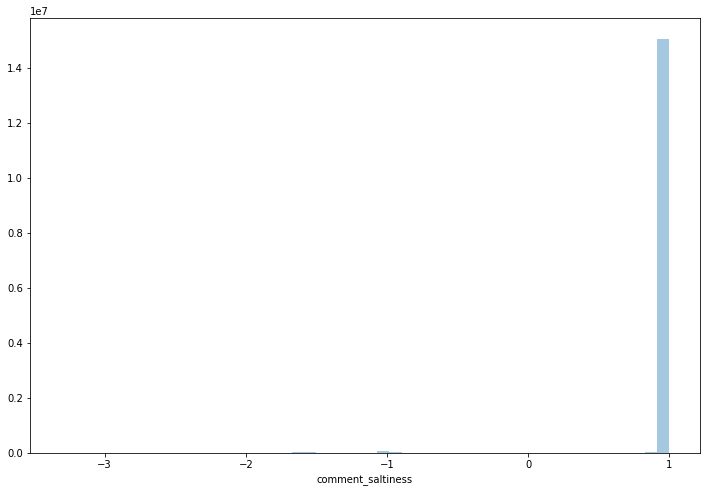

In [50]:
# Comment_Toxicity Distribution - Overall
print("There are {} total comments".format(df.shape[0]))
def distplot_sample(x):
    x_s = x
    plt.figure(figsize=(12,8))
    ax = sns.distplot(x_s.comment_saltiness,hist=True, kde=False)
distplot_sample(df)

There are 256413 toxic comments


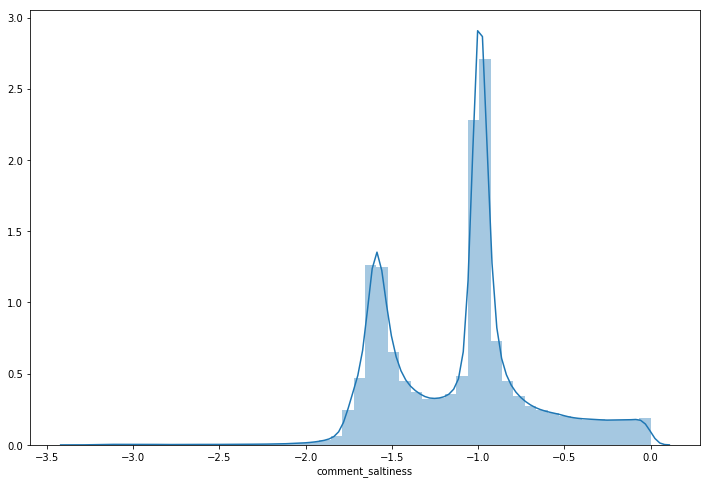

In [49]:
# Distribution of all Toxic comments. 
print("There are {} toxic comments".format(df[df['is_salty'] == True].shape[0]))
def distplot_sample(x):#
    x_s = x[x['is_salty'] == True]
    plt.figure(figsize=(12,8))
    ax = sns.distplot(x_s.comment_saltiness)
distplot_sample(df)

There are 256413 toxic comments


<Figure size 1440x1440 with 0 Axes>

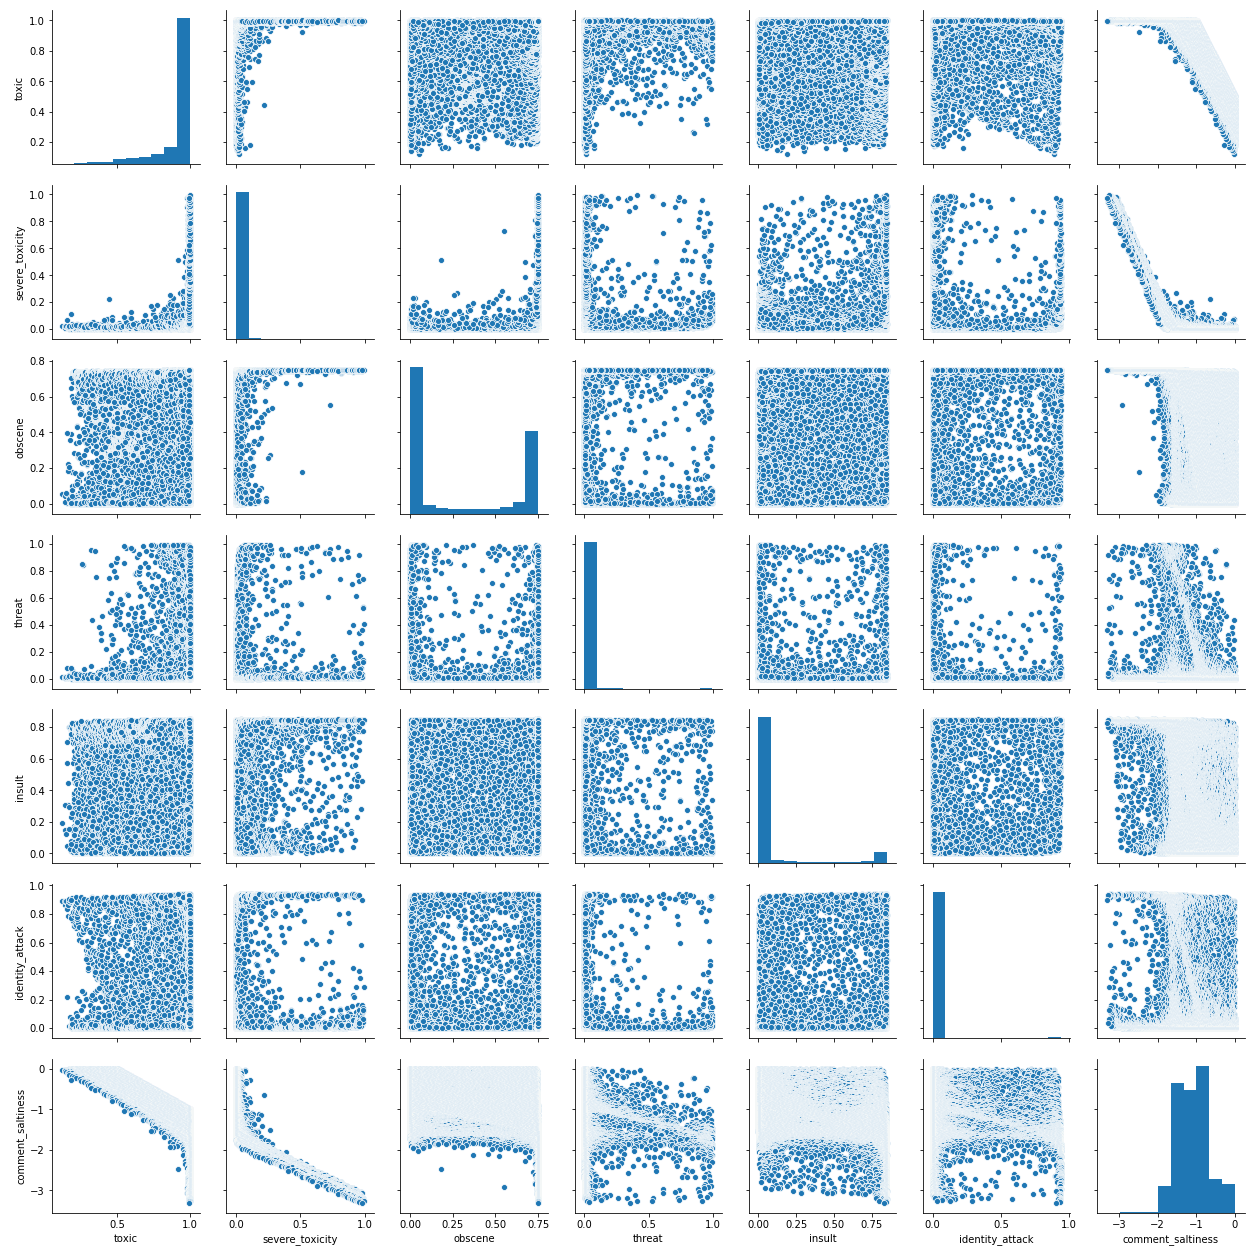

In [53]:
print("There are {} toxic comments".format(df[df['is_salty'] == True].shape[0]))
def pairplot_sample(x):#
    x_s = x[x['is_salty'] == True]
    plt.figure(figsize=(20,20))
    ax = sns.pairplot(x_s, vars=["toxic", "severe_toxicity","obscene", "threat", "insult", "identity_attack", "comment_saltiness"])
pairplot_sample(df)

### Normalize comment saltiness from sub `-1 to 1` to obj. Create booleans for +/- classes. 

In [54]:
df = df.rename(columns={'author': 'parent_author', 
                        'cleaned_title': 'parent_title',
                        'score': 'parent_score', 
                        'story_time': 'parent_time', 
                        'ranking': 'comment_rank',
                        'commentid':'comment_id',
                        'parentid':'parent_id'})

In [55]:
df_salty = df[df['is_salty'] == True].copy()

In [56]:
df_happy =  df[df['is_salty'] == False].copy()
del(df)

In [57]:
df_happy["comment_JSON"] = np.nan

In [58]:
import json
def create_comment_JSON_records(df):
    """Turns comments + stats into json objects, creates column in given df.
    
    Saves filtered dataframe columns as json object oriented on row records. 
    Decodes the JSON string into a list containing 1 JSON object per row.
    Adds new column in the given dataframe that stores the row's JSON Object.
    
    Args:
        df: The full comment dataframe.    
    """
    df['comment_JSON'] = (df[['commentor', 'comment_time', 'comment_saltiness',
                 "is_salty", "is_severe_toxicity", "is_obscene", 
                 "is_identity_attack","is_insult","is_threat",
                 'parent_type', 'parent_author', 'parent_title',
                 'cleaned_comment', 'comment_id', 'parent_id']]
             .to_dict(orient='records'))
    print( "JSON Uploaded")


create_comment_JSON_records(df_salty)

JSON Uploaded


In [59]:
df_salty.head()

,commentor,comment_time,comment_id,parent_id,parent_author,parent_time,parent_type,cleaned_comment,parent_title,comment_polarity,...,identity_attack,old_saltiness,comment_saltiness,is_salty,is_severe_toxicity,is_obscene,is_identity_attack,is_insult,is_threat,comment_JSON
2968285,Gigablah,1524885945,16945919,16944481,16945919,1.524865e+09,comment,Ironically another example of the “thought-sto...,Another Comment,0.104762,...,0.000281,0.037415,-0.000012,True,False,False,False,False,False,"{'commentor': 'Gigablah', 'comment_time': 1524..."
2369120,calibraxis,1453200753,10929872,10929802,10929872,1.453200e+09,comment,"Faced with 0.1% possiblity to make cash: ""Disr...",Another Comment,0.333333,...,0.004605,0.265432,-0.000050,True,False,False,False,False,False,"{'commentor': 'calibraxis', 'comment_time': 14..."
8547223,bwood,1390422319,7105134,7105103,7105134,1.390422e+09,comment,The largest indicator of bullshit (as I've com...,Another Comment,0.166667,...,0.000633,0.089660,-0.000065,True,False,False,False,False,False,"{'commentor': 'bwood', 'comment_time': 1390422..."
4906847,zzalpha,1450648961,10768454,10768038,10768454,1.450641e+09,comment,And not being around between 10 and 3 is just ...,Another Comment,-0.018750,...,0.001137,-0.012656,-0.000080,True,False,True,False,False,False,"{'commentor': 'zzalpha', 'comment_time': 14506..."
3658147,Aoyagi,1394911845,7405939,7405573,7405939,1.394908e+09,story,"You know, when if I had problems like that, I ...",Worse,0.275000,...,0.000961,0.158125,-0.000109,True,False,False,False,False,False,"{'commentor': 'Aoyagi', 'comment_time': 139491..."


In [60]:
data = pd.concat([df_salty, df_happy])

In [61]:
del(df_salty)
del(df_happy)

In [62]:
data.shape

(15397259, 26)

In [63]:
data.to_csv("data/predict_and_result/saving_work.csv", index = False)

### Calc some stats

In [64]:
def commentor_stats(df):
    """Returns stats about the commentor's comment history 
    
    Groups by `commentor` and calculates agg stats for 'count',`min`, `max`.
    
    Columns Created:
        `count_comments` - count the number of comments.
        `time_of_last_comment`  - Unix Epoch time of the last comment before our
                                  data was pulled on Mar 16, 2019, 12:24:46 AM.
        `time_of_first_comment` - Unix Epoch time of the earliest comment. 
    
    Args:
        df: The full comment dataframe.

    Returns: 
        out: A dataframe with index `commentor` and created columns.
    """
    out = (df.groupby('commentor', as_index=False)['comment_time']
           .agg(['count','max','min']))
    out = out.rename({'count': 'count_comments',
                      'max': 'time_of_last_comment',
                      'min': 'time_of_first_comment'}, axis='columns')
    print("Calculated commentor stats.")
    return out

In [65]:
df_ct = commentor_stats(data)
df_ct.head()

Calculated commentor stats.


,count_comments,time_of_last_comment,time_of_first_comment
commentor,,,
0-,1,1394798525,1394798525
0--__-_-__--0,1,1541102045,1541102045
0-0,1,1259867712,1259867712
0-4,12,1288646410,1288394371
0-9,2,1524324694,1477669562


### Calculate Commentor `count comments` & `first/latest` comment dates. 

Also create Dataframe_Commentor_Table, `df_ct`.

In [66]:
def calculate_monthly_summaries(df):
    """Creates summary of stats over `commentors` history by month for graphing.
    
    Calculates the `count` and `sum` aggregated stats of `comment_saltiness`
    grouped by `is_salty` & `month_text`. 
    Formats the stats into a JSON object for each commenters' period.
    Concatenates JSON Objects into a sequential sparse list (no empty months) 
    for each commentor. 
    
    Stats in the `montly_plot` list are:
        y_m: Year-Month period of stat aggregation from the `month-text` group.
        c_h: Stat, count of Happy Comments for the month.
        c_s: Stat, count of Salty Comments for the month.
        t_h: Stat, total (sum) of Happy Comment Scores for the month.
        t_s: Stat, total (sum) of Salty Comment Scores for the month.
    
    Args:
        df: The full comment dataframe.

    Returns: 
        out: A dataframe with index `commentor`, and a column `monthly_plot`. 
    """
    df['month_text'] = (pd.to_datetime(df['comment_time'],unit='s')
                        .dt.strftime('%Y_%m')).str[-5:]
    
    out = df['comment_saltiness'].groupby([df['commentor'], 
                                           df['month_text'],
                                           df['is_salty']]
                                         ).agg(['count','sum']).unstack()
    
    out.columns = [''.join(str(col)).strip() for col in out.columns.values]
    out = out.rename({"('count', False)": 'c_h', # Count Happy 
                      "('count', True)": 'c_s', # Count Salty
                      "('sum', False)": 't_h', # Sum Happy
                      "('sum', True)": 't_s'}, axis='columns') # Sum Salty 
    print("Calculated monthly stats")
    
    # Combine the monthly_stats into an object. 
    out.reset_index(inplace=True)
    out = out.rename({"month_text": 'y_m'},axis='columns')
    out = out.fillna(0.0)
    out["t_h"] = out["t_h"].round(decimals=2)
    out["t_s"] = out["t_s"].round(decimals=2)
    out['monthly_graph'] = (out[["y_m","t_s","t_h","c_s","c_h"]].to_dict(orient='records'))
    
    # Combine the montly_stats_object into a list for each commentor.
    out.sort_values(['commentor','y_m'], ascending=[True, True])
    keys, values = out[['commentor', 'monthly_graph']].values.T
    ukeys, index = np.unique(keys, True)
    arrays = np.split(values,index[1:])
    df = pd.DataFrame(data = {'monthly_plot':[list(a) for a in arrays]},
                      index = ukeys)
    print("Created monthly stat lists.")  
    return df


# Run Function & Merge into df_ct
df_ct = pd.merge(df_ct, calculate_monthly_summaries(data),
                 left_index=True, right_index=True, how='left')
df_ct.head()

Calculated monthly stats
Created monthly stat lists.


,count_comments,time_of_last_comment,time_of_first_comment,monthly_plot
commentor,,,,
0-,1,1394798525,1394798525,"[{'y_m': '14_03', 't_s': 0.0, 't_h': 1.0, 'c_s..."
0--__-_-__--0,1,1541102045,1541102045,"[{'y_m': '18_11', 't_s': 0.0, 't_h': 1.0, 'c_s..."
0-0,1,1259867712,1259867712,"[{'y_m': '09_12', 't_s': 0.0, 't_h': 1.0, 'c_s..."
0-4,12,1288646410,1288394371,"[{'y_m': '10_10', 't_s': 0.0, 't_h': 10.99, 'c..."
0-9,2,1524324694,1477669562,"[{'y_m': '16_10', 't_s': 0.0, 't_h': 1.0, 'c_s..."


### Create the 50 `top_cmnts_s `list for each Commentor - Filter by `is_salty`

In [67]:
def top_salty_comments(df):
    """Creates list object for each `commentor` of top 50 saltiest comments. 
    
    Filters by `is_salty` = True.
    Sorts values by `comment_saltiness` from the most salty (lowest value).
    Groups dataframe by `commentor'.
    Concatenates top 50 `comment_JSON` comment objects into a list object.
    Creates a new column from the list of obj(commentor's list of json objects).
    
    Args:
        df: The full comment dataframe.

    Returns: 
        df: A dataframe w/ index `commentor` and a column 'top_cmnts_s'.
    """
    # Grab the right comments, pulls up to 50 comments by saltiest.
    df = df[df['is_salty'] == True]
    df = df.sort_values(['commentor','comment_saltiness'],
                        ascending=[True, True])
    df = (df[['commentor','comment_JSON']].groupby(df['commentor']).head(50)
          .reset_index(drop=True))
    
    # Group the comments into a list for each user.
    keys, values = df.values.T
    ukeys, index = np.unique(keys, True)
    arrays = np.split(values,index[1:])
    df = pd.DataFrame(data = {'top_cmnts_s':[list(a) for a in arrays]},
                      index = ukeys)
    print("Grabbed the SALTIEST comments.")
    return df   


# Run Function & Merge into df_ct
df_ct = pd.merge(df_ct, top_salty_comments(data),
                 left_index=True, right_index=True, how='left')

Grabbed the SALTIEST comments.


### Get the `top_salty_comment` for each Commentor - Need it for `Rank` Lists

In [68]:
def the_top_salty_comment(df):
    """Returns the top salty comment of each `commentor`. 
    
    Filters by `is_salty`
    Sorts on `commentor` and `comment_saltiness` to bring saltiest to top.
    Groups dataframe by `commentor`. 
    Creates a list containing the top comment for each `commentor`. 
    Turns the list into a new column: `top_salty_comment`
    
    Args:
        df: The full comment dataframe.

    Returns: 
        df: A dataframe w/ index `commentor` and column `top_salty_comment`.
    """
    # Grab the right comments, will pull the top salty comment.
    df = df[df['is_salty'] == True]
    df = df.sort_values(['commentor','comment_saltiness'],
                        ascending=[True, True])
    df = (df[['commentor','comment_JSON']].groupby(df['commentor']).head(1)
          .reset_index(drop=True))
    
    # Group the comments into a list for each user.
    keys, values = df.values.T
    ukeys, index = np.unique(keys, True)
    arrays = np.split(values,index[1:])
    df = pd.DataFrame(data = {'top_salty_comment':[list(a) for a in arrays]},
                      index = ukeys)
    print("Grabbed the top SALTIEST comment.")
    return df   


# Run Function & Merge into df_ct
df_ct = pd.merge(df_ct, the_top_salty_comment(data),
                 left_index=True, right_index=True, how='left')

Grabbed the top SALTIEST comment.


### Calculate stats for Saltiness - `Overall`

In [69]:
def saltiness_stats(df):
    """Creates stats of `comment_saltiness` overall.
    
    First groups dataframe by `commentor`. 
    Aggregates `count`, `sum`, & `mean` stats of `comment_saltiness` by `is_salty`.
    Creates new column for each aggregate stat: 4 new columns.
    
    Args:
        df: The full comment dataframe.

    Returns: 
        out: A dataframe with index `commentor`, and a column for each agg.stat.
    """
    out = (df.groupby('commentor', as_index=False)['comment_saltiness']
           .agg(['sum', 'mean', 'min', 'max']))
    out = out.rename({'sum': 'sum_slt_oall',
                      'mean': 'average_slt_oall',
                      'min': 'min_slt_oall',
                      'max': 'max_slt_oall'}, axis='columns')
    print("Calculated saltiness overall stats.")
    return out


# Run Function & Merge into df_ct
df_ct = pd.merge(df_ct, saltiness_stats(data), left_index=True,
                 right_index=True, how='left')

Calculated saltiness overall stats.


### Calculate stats for Saltiness - Split `Happy/Salty`

In [70]:
def saltiness_stats_split(df):
    """Creates stats of `comment_saltiness` by `is_salty`. 
    
    First groups dataframe by `commentor`. 
    Aggregates `count`, `sum`, & `mean` stats of `comment_saltiness` by `is_salty`. 
    Creates new column for each aggregate stat: 6 new columns. 
    
    Args:
        df: The full comments dataframe.

    Returns: 
        out: A dataframe with index `commentor`, and a column for each agg.stat.
    """
    out = (df['comment_saltiness'].groupby([df['commentor'],df['is_salty']])
           .agg(['count','sum', 'mean']).unstack())
    out.columns = [''.join(str(col)).strip() for col in out.columns.values]
    out = out.rename({"('count', False)": 'cnt_slt_h',
                      "('count', True)": 'cnt_slt_s',
                      "('sum', False)": 'sum_slt_h',
                      "('sum', True)": 'sum_slt_s',
                      "('mean', False)":"avg_slt_h",
                      "('mean', True)":"avg_slt_s"},
                     axis='columns')
    print("Calculated saltiness grouped stats - split by salty/happy.")
    return out


# Run Function & Merge into df_ct
df_ct = pd.merge(df_ct, saltiness_stats_split(data), left_index=True,
                 right_index=True, how='left')

Calculated saltiness grouped stats - split by salty/happy.


In [71]:
df_ct.head()

,count_comments,time_of_last_comment,time_of_first_comment,monthly_plot,top_cmnts_s,top_salty_comment,sum_slt_oall,average_slt_oall,min_slt_oall,max_slt_oall,cnt_slt_h,cnt_slt_s,sum_slt_h,sum_slt_s,avg_slt_h,avg_slt_s
commentor,,,,,,,,,,,,,,,,
0-,1,1394798525,1394798525,"[{'y_m': '14_03', 't_s': 0.0, 't_h': 1.0, 'c_s...",NaN,NaN,0.999353,0.999353,0.999353,0.999353,1.0,NaN,0.999353,NaN,0.999353,NaN
0--__-_-__--0,1,1541102045,1541102045,"[{'y_m': '18_11', 't_s': 0.0, 't_h': 1.0, 'c_s...",NaN,NaN,0.999393,0.999393,0.999393,0.999393,1.0,NaN,0.999393,NaN,0.999393,NaN
0-0,1,1259867712,1259867712,"[{'y_m': '09_12', 't_s': 0.0, 't_h': 1.0, 'c_s...",NaN,NaN,0.999354,0.999354,0.999354,0.999354,1.0,NaN,0.999354,NaN,0.999354,NaN
0-4,12,1288646410,1288394371,"[{'y_m': '10_10', 't_s': 0.0, 't_h': 10.99, 'c...",NaN,NaN,11.991090,0.999258,0.998454,0.999409,12.0,NaN,11.991090,NaN,0.999258,NaN
0-9,2,1524324694,1477669562,"[{'y_m': '16_10', 't_s': 0.0, 't_h': 1.0, 'c_s...",NaN,NaN,1.997974,0.998987,0.998594,0.999381,2.0,NaN,1.997974,NaN,0.998987,NaN


In [72]:
df_ct.to_csv("data/predict_and_result/df_ct_saving.csv", index = False)

In [83]:
hn_cs = df_ct.copy()

### Create Ranking Columns for AMT of Salt Contributed Rank, Qty of Salty Comments Rank, Overall_Saltiest_Rank, & Saltiest_Trolls_Rank

In [84]:
def rank_sum_lifetime_amount(df):
    """ Ranks all commentors by the sum of their total salt contributed. 
    
    Sorts by the sum of salty comment scores `sum_slt_s` from lowest to highest.
    More negative (lower) = more salty.
    Assigns a rank based on position after sorting. 
    Creates a new column for the rank. 
    
    Args:
        df: The commentor_summary dataframe.
        
    Returns: 
        out: A dataframe with index `commentor` and column `rank_lt_amt_slt`.
    """
    out = (df[df['sum_slt_s'] < 0].sort_values(by=['sum_slt_s']))
    out["rank_lt_amt_slt"] = (out.sum_slt_s.rank(axis=0, method='first'))
    out = out["rank_lt_amt_slt"]
    print("Created rank_sum_lifetime_amount.")
    return out


hn_cs = pd.merge(hn_cs, rank_sum_lifetime_amount(hn_cs),left_index=True, 
                 right_index=True, how='left')


def rank_sum_lifetime_qty(df):
    """Rank all commentors on the quantity of salty comments contributed. 
    
    Sorts by the count of salty comments `cnt_slt_s` from highest to lowest. 
    Assigns a rank based on position after sorting. 
    Creates a new column for the rank. 
    
    Args:
        df: The commentor_summary dataframe.
        
    Returns: 
        out: A dataframe with index `commentor` and column `rank_lt_qty_sc`.
    """
    out = df.sort_values(by='cnt_slt_s', ascending=False)
    out["rank_lt_qty_sc"] = (out.cnt_slt_s.rank(axis=0, method='first',
                                                  ascending=False))
    out = out["rank_lt_qty_sc"]
    print("Created rank_sum_lifetime_qty.")
    return out


hn_cs = pd.merge(hn_cs, rank_sum_lifetime_qty(hn_cs), left_index=True,
                 right_index=True, how='left')


def rank_overall_saltiest(df):
    """Rank commmentors on overall sum of their lifetime happy & salty scores.
    
    Filters commentors to ensure each:
        Has overall Saltiness < 0.
    Sorts by the overall saltiness score `sum_slt_oall`, i.e. sum of happy+salty
    scores across all comments. From lowest to highest.
    Assigns a rank based on position after sorting.
    Creates a new column for the rank.
 
    Indicates: Indicates a tendancy towards a majority of comments being salty. 
    
    Args:
        df: The commentor_summary dataframe.
        
    Returns: 
        out: A dataframe with index `commentor` and column `rank_oall_slt`.
    """
    out = (df[(df['sum_slt_oall'] < 0) & (df['cnt_slt_s'] > 0)] 
             #(df['cnt_slt_h'] > 0) & (df['count_comments'] > 20)
           .sort_values(by=['sum_slt_oall']))
    out["rank_oall_slt"] = out.sum_slt_oall.rank(axis=0, method='first')
    out = out["rank_oall_slt"]
    print("Created rank_overall_saltiest.")
    return out


hn_cs = pd.merge(hn_cs, rank_overall_saltiest(hn_cs), left_index=True,
                 right_index=True, how='left')

# Not enough difference between these rank overall saltiest. 
# def rank_saltiest_trolls(df):
#     """Rank commentors, who lack any positive comments, by overall saltiness.
    
#     Filters commentors to ensure each:
#         Has no happy comments.
#         Has overall Saltiness < 0.
#     Sorts by the overall saltiness score `sum_slt_oall`, i.e. sum of happy+salty
#     scores across all comments. From lowest to highest.
#     Assigns a rank based on position after sorting.
#     Creates a new column for the rank.
 
#     Reasoning:
#         Absolute Lack of positive comments is rare. Typically indicates a 
#         purpose made "trolling" account. 
  
#     Args:
#         df: The commentor_summary dataframe.
        
#     Returns: 
#         out: A dataframe with index `commentor` and column `rank_oall_slt`.
#     """
#     out = df[(df["cnt_slt_h"].isnull()) &
#              (df['sum_slt_oall'] < 0)].sort_values(by=['sum_slt_oall'])
#     out["rank_slt_trolls"] = out.sum_slt_oall.rank(axis=0, method='first')
#     out = out["rank_slt_trolls"]
#     print("Created rank_saltiest_trolls.")
#     return out


# hn_cs = pd.merge(hn_cs, rank_saltiest_trolls(hn_cs), left_index=True,
#                  right_index=True, how='left')


hn_cs.reset_index(inplace=True)

Created rank_sum_lifetime_amount.
Created rank_sum_lifetime_qty.
Created rank_overall_saltiest.


###  Create Top100 Lists for AMT of Salt Contributed Rank, Qty of Salty Comments Rank, Overall_Saltiest_Rank, & Saltiest_Trolls_Rank & SAVE AS JSON

In [85]:
def top100_amt_salt(df):
    """Saves a .JSON of the Top 100 Commentors by `rank_lt_amt_slt`
    
    Sorts by `rank_lt_amt_slt`
    Creates dataframe of rows [0:100] by `rank_lt_amt_slt`
    Saves dataframe as `top100_AMT_Salt_Contributed.json`
    
    Args:
        df: The commentor_summary dataframe w/ ranks.
    """ 
    top100 = (df[df["rank_lt_amt_slt"].notnull()]
              .sort_values(by=["rank_lt_amt_slt"]).head(100))
    top100 = top100[["commentor", "rank_lt_amt_slt",
                     "sum_slt_s", "top_salty_comment"]]
    top100.to_json('Final_Data2/top100_AMT_Salt_Contributed.json',
                   orient='records')
    print("Saved top100_AMT_Salt_Contributed.json")

top100_amt_salt(hn_cs)


def top100_qty_salty_comments(df):
    """Creates a dataframe of the Top100 Commentors by `rank_lt_qty_sc`
    
    Sorts by `rank_lt_qty_sc`
    Makes a dataframe of rows [0:100] by `rank_lt_qty_sc`
    Saves dataframe as `top100_AMT_Salt_Contributed.json`
    
    Args:
        df: The commentor_summary dataframe w/ ranks.
    """ 
    top100 = (df[df["rank_lt_qty_sc"].notnull()]
              .sort_values(by=["rank_lt_qty_sc"]).head(100))
    top100 = top100[["commentor", "rank_lt_qty_sc",
                     "cnt_slt_s", "top_salty_comment"]]
    top100.to_json('Final_Data2/top100_QTY_Salty_Comments.json',
                   orient='records')
    print("Saved top100_qty_salty_comments.json")


top100_qty_salty_comments(hn_cs)


def top100_overall_saltiest(df):
    """Creates a dataframe of the Top100 Commentors by `rank_oall_slt`
    
    Sorts by `rank_oall_slt`
    Makes a dataframe of rows [0:100] by `rank_oall_slt`
    Saves df as a json record of with name `top100_Overall_Saltiest.json`
      
    Args:
        df: The commentor_summary dataframe w/ ranks.
    """ 
    top100 = (df[df["rank_oall_slt"].notnull()]
              .sort_values(by=["rank_oall_slt"]).head(100))
    top100 = top100[["commentor", "rank_oall_slt",
                     "sum_slt_oall", "top_salty_comment"]]
    top100.to_json('Final_Data2/top100_Overall_Saltiest.json', orient='records')
    print("Saved top100_Overall_Saltiest.json")
    

top100_overall_saltiest(hn_cs)


# def top100_saltiest_trolls(df):
#     """Creates a dataframe of the Top100 Trolls by `rank_slt_trolls`
    
#     Sorts by `rank_slt_trolls`
#     Makes a dataframe of rows [0:100] by `rank_slt_trolls`
#     Saves df as a json record of with name `top100_Saltiest_Trolls.json`
      
#     Args:
#         df: The commentor_summary dataframe w/ ranks.
#     """ 
#     top100 = (df[df["rank_slt_trolls"].notnull()]
#               .sort_values(by=["rank_slt_trolls"]).head(100))
#     top100 = top100[["commentor", "rank_slt_trolls",
#                      "sum_slt_oall", "top_salty_comment"]]
#     top100.to_json('Final_Data2/top100_Saltiest_Trolls.json',
#                                       orient='records')
#     print("Saved top100_Saltiest_Trolls.json")


# top100_saltiest_trolls(hn_cs)

Saved top100_AMT_Salt_Contributed.json
Saved top100_AMT_Salt_Contributed.json
Saved top100_Overall_Saltiest.json


### Prepare and Save  `hn_cs` as `.csv` for upload to PostgreSQL. 

In [86]:
hn_cs.to_csv('Final_Data2/hn_commentor_summary.csv',index=False)

In [87]:
hn_cs.to_pickle('data/hn_cs.pkl')
print('Dataframe Saved')

Dataframe Saved


## Create HackerNews Overall "Scorecard" Stats

In [88]:
data["year"] = pd.to_datetime(data['comment_time'],unit='s').dt.strftime('%Y')
data["month"] = (pd.to_datetime(data['comment_time'],unit='s').dt.strftime('%Y_%m')).str[-5:]
data["all_time"] = "all_time"

In [89]:
def hn_overall_stats(df):
    df = df.copy()
    # Calculate by All Time
    df["period"] = df['all_time']
    df_s = df[df['is_salty'] == True]
    split = df_s['comment_saltiness'].groupby([df_s['period']]).agg(['count','sum'])
    split = split.rename({'count': 'hn_cnt_slt_s', 'sum': 'hn_sum_slt_s'}, axis='columns')
    overall = df['comment_saltiness'].groupby([df['period']]).agg(['count','sum', 'mean'])
    overall = overall.rename({'sum': 'hn_sum_slt_oall','mean': 'hn_avg_oall','count': 'hn_count_oall'}, axis='columns')
    overall = pd.merge(overall, split, left_index=True, right_index=True, how='left')
    df_a = overall
    # Calculate by Year
    df["period"] = df['year']
    df_s = df[df['is_salty'] == True]
    split = df_s['comment_saltiness'].groupby([df_s['period']]).agg(['count','sum'])
    split = split.rename({'count': 'hn_cnt_slt_s', 'sum': 'hn_sum_slt_s'}, axis='columns')
    overall = df['comment_saltiness'].groupby([df['period']]).agg(['count','sum', 'mean'])
    overall = overall.rename({'sum': 'hn_sum_slt_oall','mean': 'hn_avg_oall','count': 'hn_count_oall'}, axis='columns')
    overall = pd.merge(overall, split, left_index=True, right_index=True, how='left')
    df_b = overall
    # Calculate by Month
    df["period"] = df['month']
    df_s = df[df['is_salty'] == True]
    split = df_s['comment_saltiness'].groupby([df_s['period']]).agg(['count','sum'])
    split = split.rename({'count': 'hn_cnt_slt_s', 'sum': 'hn_sum_slt_s'}, axis='columns')
    overall = df['comment_saltiness'].groupby([df['period']]).agg(['count','sum', 'mean'])
    overall = overall.rename({'sum': 'hn_sum_slt_oall','mean': 'hn_avg_oall','count': 'hn_count_oall'}, axis='columns')
    overall = pd.merge(overall, split, left_index=True, right_index=True, how='left')
    df_c = overall
    # Concat them together
    df = pd.concat([df_a, df_b, df_c])
    return df

hn_stats_summary = hn_overall_stats(data)
display(hn_stats_summary.head(4))

,hn_count_oall,hn_sum_slt_oall,hn_avg_oall,hn_cnt_slt_s,hn_sum_slt_s
period,,,,,
all_time,15397259,1.480763e+07,0.961706,256413,-281771.182444
2006,12,1.000136e+01,0.833447,1,-0.991722
2007,69214,6.621121e+04,0.956616,1340,-1439.409576
2008,241567,2.297361e+05,0.951025,5231,-5718.064747


## Get a Summary of User Stats by Month for finding the Saltiest Commenter for each month. 

In [90]:
# CREATE OUR SUMMARY OF USER STATS BY MONTH
def css_get(df, period_text): 
    """Uses comments_data not commentor_summary
    Prepare the df by sorting. 
    Calculate `sum_slt_oall` for each commentor/period.
    Calculate the `top_salty_comment` for each commentor/period.
    Filter by is_salty
    Calculate `sum_slt_s` & `cnt_slt_s` for each commentor/period.
    """
    df["period"] = df[period_text]
    df = df.sort_values(['commentor','comment_saltiness'], ascending=[True, True])
    df_a = df['comment_saltiness'].groupby([df['commentor'],df['period']]).agg(['sum'])
    df_a = df_a.rename({'sum': 'sum_slt_oall'}, axis='columns')
    df_b = (df[['period','commentor','comment_JSON','comment_saltiness']].groupby([df['commentor'], df['period']]).head(1))
    df_b.set_index(['commentor', 'period'], inplace=True)
    df = df[df['is_salty'] == True]
    df_c = df['comment_saltiness'].groupby([df['commentor'],df['period']]).agg(['count','sum'])
    df_c = df_c.rename({'count': 'cnt_slt_s', 'sum': 'sum_slt_s'}, axis='columns')
    df = df_c.join([df_a,df_b], how = 'left')
    df = df.rename(columns = {'comment_JSON': 'top_salty_comment'})
    return df

css_data = pd.concat([css_get(data,"all_time"), css_get(data,"year"), css_get(data,"month")])
css_table = css_data.sort_values(["period"]).reset_index()
css_table.head(4)

,commentor,period,cnt_slt_s,sum_slt_s,sum_slt_oall,top_salty_comment,comment_saltiness
0,spez,06_10,1,-0.991722,2.006394,"{'commentor': 'spez', 'comment_time': 11604954...",-0.991722
1,imp,07_02,1,-0.965002,-0.965002,"{'commentor': 'imp', 'comment_time': 117258685...",-0.965002
2,Nick_Smith,07_02,2,-1.960739,10.031764,"{'commentor': 'Nick_Smith', 'comment_time': 11...",-1.415886
3,jwecker,07_02,1,-0.856234,67.044637,"{'commentor': 'jwecker', 'comment_time': 11725...",-0.856234


## Select the top Saltiest by each of our rank methods for `all_time`, `year`, and by `month`.  Merge them, then merge with `hn_scorecard_summary`. Save as json. 

In [91]:
# By Count of Salty Comments CSC
def hn_agg_a(df):
    df = df.copy()
    df = df.sort_values(['period','cnt_slt_s','sum_slt_s'], ascending=[True, False, True])
    df_b = df[['period','commentor','cnt_slt_s', 'top_salty_comment']].groupby([df['period']]).head(1)
    df_b.set_index(['period'], inplace=True)
    df_b.columns = ['csc_'+ str(col) for col in df_b.columns]    
    return df_b


# By Sum of Salty Comments SSC
def hn_agg_b(df): 
    df = df.copy()
    df = df.sort_values(['period','sum_slt_s','cnt_slt_s'], ascending=[True, True, False])
    df_b = df[['period','commentor','sum_slt_s', 'top_salty_comment']].groupby([df['period']]).head(1)
    df_b.set_index(['period'], inplace=True)
    df_b.columns = ['ssc_' + str(col) for col in df_b.columns]
    return df_b


# By Sum of Overall Salt (Postive + Negative) - SOS
def hn_agg_c(df): # Uses comments_data not commentor_summary
    df = df.copy()
    df = df.sort_values(['period','sum_slt_oall','cnt_slt_s'], ascending=[True, True, False])
    df_b = df[['period','commentor','sum_slt_oall', 'top_salty_comment']].groupby([df['period']]).head(1)
    df_b.set_index(['period'], inplace=True)
    df_b.columns = ['sos_' + str(col) for col in df_b.columns]
    return df_b


# By Saltiest Comment for the Period - SCP
def hn_agg_d(df): # Uses comments_data not commentor_summary
    df = df.copy()
    df = df.sort_values(['period', 'comment_saltiness', 'sum_slt_s', 'cnt_slt_s'], ascending=[True, True, True, False])
    df_b = df[['period', 'commentor', 'comment_saltiness', 'top_salty_comment']].groupby([df['period']]).head(1)
    df_b.set_index(['period'], inplace=True)
    df_b.columns = ['scp_' + str(col) for col in df_b.columns]
    return df_b

hn_agg_csc = hn_agg_a(css_table)
hn_agg_ssc = hn_agg_b(css_table)
hn_agg_sos = hn_agg_c(css_table)
hn_agg_scp = hn_agg_d(css_table)

hn_agg = pd.concat([hn_agg_csc, hn_agg_ssc, hn_agg_sos, hn_agg_scp], axis = 1)
hn_stats_summary_w_agg = pd.concat([hn_stats_summary, hn_agg], axis = 1) 

display(hn_stats_summary_w_agg.shape)
display(hn_stats_summary_w_agg.head(4))
display(hn_stats_summary_w_agg.columns)

hn_stats_summary_w_agg.to_json('Final_Data2/hn_stats_summary_w_agg_v2.json',
                                      orient='records')
display(print("saved hn_stats_summary_w_agg.json"))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



(161, 17)

,hn_count_oall,hn_sum_slt_oall,hn_avg_oall,hn_cnt_slt_s,hn_sum_slt_s,csc_commentor,csc_cnt_slt_s,csc_top_salty_comment,ssc_commentor,ssc_sum_slt_s,ssc_top_salty_comment,sos_commentor,sos_sum_slt_oall,sos_top_salty_comment,scp_commentor,scp_comment_saltiness,scp_top_salty_comment
06_10,12,10.001360,0.833447,1,-0.991722,spez,1,"{'commentor': 'spez', 'comment_time': 11604954...",spez,-0.991722,"{'commentor': 'spez', 'comment_time': 11604954...",spez,2.006394,"{'commentor': 'spez', 'comment_time': 11604954...",spez,-0.991722,"{'commentor': 'spez', 'comment_time': 11604954..."
07_02,974,954.334390,0.979809,9,-8.685098,Nick_Smith,2,"{'commentor': 'Nick_Smith', 'comment_time': 11...",Nick_Smith,-1.960739,"{'commentor': 'Nick_Smith', 'comment_time': 11...",imp,-0.965002,"{'commentor': 'imp', 'comment_time': 117258685...",Nick_Smith,-1.415886,"{'commentor': 'Nick_Smith', 'comment_time': 11..."
07_03,4473,4380.398792,0.979298,41,-42.850164,dfranke,3,"{'commentor': 'dfranke', 'comment_time': 11731...",dfranke,-3.542237,"{'commentor': 'dfranke', 'comment_time': 11731...",henning,-1.609839,"{'commentor': 'henning', 'comment_time': 11733...",create_account,-1.726113,"{'commentor': 'create_account', 'comment_time'..."
07_04,8039,7724.473578,0.960875,141,-151.147651,omouse,4,"{'commentor': 'omouse', 'comment_time': 117716...",omouse,-4.691519,"{'commentor': 'omouse', 'comment_time': 117716...",JamesPunk,-1.636127,"{'commentor': 'JamesPunk', 'comment_time': 117...",MobileDigit,-1.800804,"{'commentor': 'MobileDigit', 'comment_time': 1..."


Index(['hn_count_oall', 'hn_sum_slt_oall', 'hn_avg_oall', 'hn_cnt_slt_s',
       'hn_sum_slt_s', 'csc_commentor', 'csc_cnt_slt_s',
       'csc_top_salty_comment', 'ssc_commentor', 'ssc_sum_slt_s',
       'ssc_top_salty_comment', 'sos_commentor', 'sos_sum_slt_oall',
       'sos_top_salty_comment', 'scp_commentor', 'scp_comment_saltiness',
       'scp_top_salty_comment'],
      dtype='object')

saved hn_stats_summary_w_agg.json


None

## Save the comment dataframe with all of the custom fields as a CSV.

In [92]:
data.to_csv('Final_Data2/hn_comments_full_db_w_custom_fields_v2.csv',index=False)